In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", message="'force_all_finite' was renamed")
from main import evaluate_clustering

# data imports

In [85]:
energy_complete = pd.read_csv('recs2020.csv')

In [86]:
energy_complete

,DOEID,REGIONC,DIVISION,STATE_FIPS,state_postal,state_name,BA_climate,IECC_climate_code,UATYP10,HDD65,...,EVCHRGHOME,EVCHRGAPT,EVCHRGWKS,EVCHRGBUS,EVCHRGMUNI,EVCHRGDLR,EVCHRGHWY,EVCHRGOTH,EVHOMEAMT,EVCHRGTYPE
0,100001,WEST,Mountain South,35,NM,New Mexico,Mixed-Dry,4B,U,3844,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
1,100002,SOUTH,West South Central,5,AR,Arkansas,Mixed-Humid,4A,U,3766,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2,100003,WEST,Mountain South,35,NM,New Mexico,Mixed-Dry,4B,U,3819,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,100004,SOUTH,South Atlantic,45,SC,South Carolina,Mixed-Humid,3A,U,2614,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,100005,NORTHEAST,Middle Atlantic,34,NJ,New Jersey,Mixed-Humid,4A,U,4219,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18491,118492,SOUTH,South Atlantic,24,MD,Maryland,Mixed-Humid,4A,U,4572,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18492,118493,NORTHEAST,New England,23,ME,Maine,Very-Cold,7A,R,9861,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18493,118494,SOUTH,West South Central,48,TX,Texas,Hot-Humid,2A,U,405,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18494,118495,SOUTH,South Atlantic,45,SC,South Carolina,Hot-Humid,3A,U,1245,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [87]:
energy_complete.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'STATE_FIPS', 'state_postal',
       'state_name', 'BA_climate', 'IECC_climate_code', 'UATYP10', 'HDD65',
       ...
       'EVCHRGHOME', 'EVCHRGAPT', 'EVCHRGWKS', 'EVCHRGBUS', 'EVCHRGMUNI',
       'EVCHRGDLR', 'EVCHRGHWY', 'EVCHRGOTH', 'EVHOMEAMT', 'EVCHRGTYPE'],
      dtype='object', length=799)

In [88]:
energy_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18496 entries, 0 to 18495
Columns: 799 entries, DOEID to EVCHRGTYPE
dtypes: float64(243), int64(549), object(7)
memory usage: 112.7+ MB


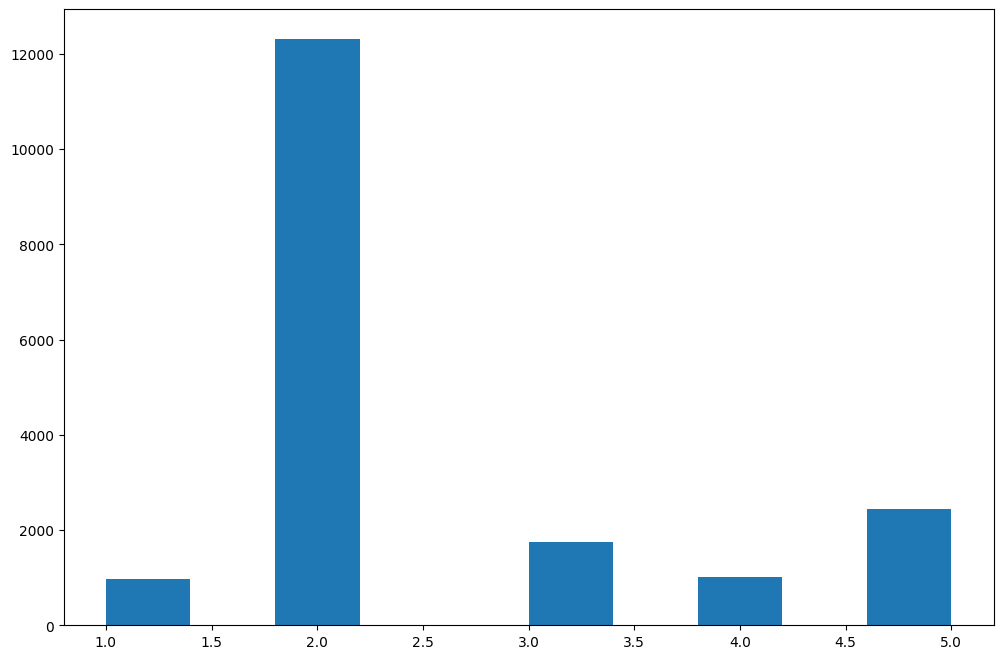

In [89]:
plt.figure(figsize=(12,8))
plt.hist(energy_complete['TYPEHUQ'])
plt.show()

In [90]:
energy_complete = energy_complete[energy_complete['TYPEHUQ'] == 2.0]

In [91]:
energy_complete

,DOEID,REGIONC,DIVISION,STATE_FIPS,state_postal,state_name,BA_climate,IECC_climate_code,UATYP10,HDD65,...,EVCHRGHOME,EVCHRGAPT,EVCHRGWKS,EVCHRGBUS,EVCHRGMUNI,EVCHRGDLR,EVCHRGHWY,EVCHRGOTH,EVHOMEAMT,EVCHRGTYPE
0,100001,WEST,Mountain South,35,NM,New Mexico,Mixed-Dry,4B,U,3844,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,100004,SOUTH,South Atlantic,45,SC,South Carolina,Mixed-Humid,3A,U,2614,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
5,100006,SOUTH,West South Central,48,TX,Texas,Hot-Humid,2A,U,901,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
6,100007,SOUTH,West South Central,40,OK,Oklahoma,Mixed-Humid,3A,U,3148,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
10,100011,WEST,Pacific,6,CA,California,Hot-Dry,3B,U,1467,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18488,118489,SOUTH,South Atlantic,12,FL,Florida,Hot-Humid,2A,R,184,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18489,118490,SOUTH,South Atlantic,51,VA,Virginia,Mixed-Humid,4A,R,4856,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18492,118493,NORTHEAST,New England,23,ME,Maine,Very-Cold,7A,R,9861,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18494,118495,SOUTH,South Atlantic,45,SC,South Carolina,Hot-Humid,3A,U,1245,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


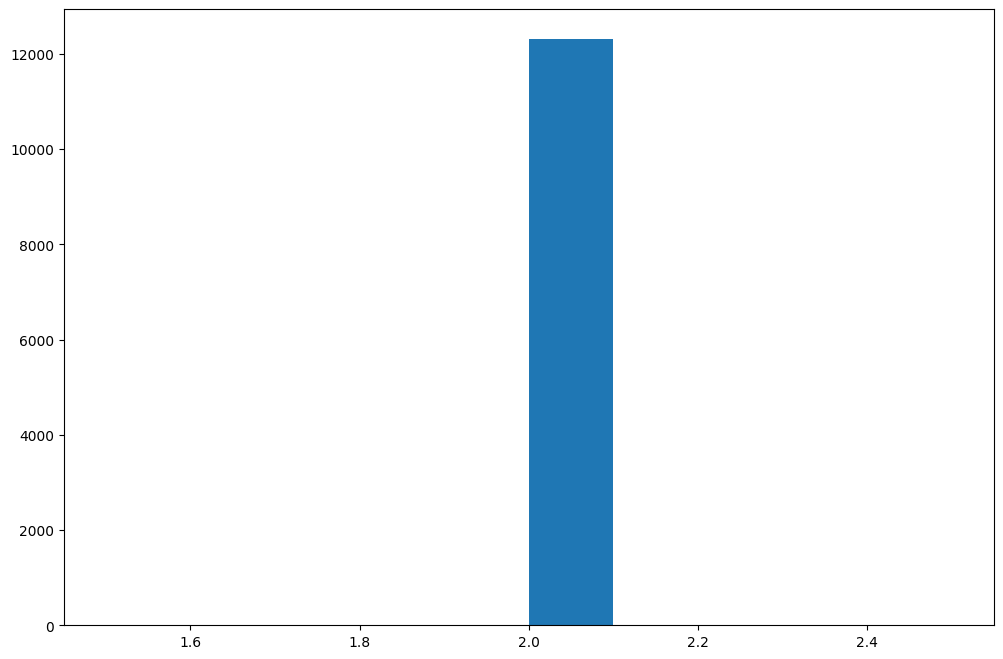

In [92]:
plt.figure(figsize=(12,8))
plt.hist(energy_complete['TYPEHUQ'])
plt.show()

In [93]:
cols_to_keep = []

for i in energy_complete.columns:
    if (energy_complete[i].nunique(dropna=True) > 20) and (not energy_complete[i].eq(-2).any()):
        cols_to_keep.append(i)

In [94]:
energy_complete = energy_complete[cols_to_keep]

In [95]:
cols_to_drop = []

for i in energy_complete.columns:
    if "weight" in i.lower():
        cols_to_drop.append(i)

In [96]:
energy_complete.drop(cols_to_drop, axis=1)

,DOEID,STATE_FIPS,state_postal,state_name,HDD65,CDD65,HDD30YR_PUB,CDD30YR_PUB,LGTIN1TO4,LGTIN4TO8,...,TOTALBTUSPH,TOTALDOLSPH,TOTALBTUWTH,TOTALDOLWTH,TOTALBTUOTH,TOTALDOLOTH,TOTALBTU,TOTALDOL,DBT1,GWT
0,100001,35,NM,New Mexico,3844,1679,4451,1027,6,8,...,73942.18,509.15,21241.34,146.26,35017.07,1340.37,144647.71,2656.89,92.9,58.5
3,100004,45,SC,South Carolina,2614,1718,3229,1653,14,2,...,42812.12,836.64,21061.21,243.37,14574.78,607.29,86765.19,2061.77,91.8,61.5
5,100006,48,TX,Texas,901,3558,1150,3588,19,4,...,14561.39,175.62,19508.22,235.29,21697.41,776.97,85400.64,2335.08,93.4,72.2
6,100007,40,OK,Oklahoma,3148,2128,3564,2043,5,3,...,80477.74,916.91,13867.47,116.44,18609.35,534.11,131875.03,2110.50,96.8,59.5
10,100011,6,CA,California,1467,2108,1944,1747,1,2,...,22218.75,289.45,10228.95,133.25,13509.22,33.77,58496.25,487.81,98.8,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18488,118489,12,FL,Florida,184,4349,345,3655,6,10,...,0.00,0.00,6011.89,185.71,28815.90,890.16,54176.08,1673.56,92.6,78.1
18489,118490,51,VA,Virginia,4856,793,5407,558,4,4,...,5587.51,165.50,893.39,44.49,2502.48,124.62,9563.30,363.49,89.5,52.4
18492,118493,23,ME,Maine,9861,283,9862,186,4,0,...,193613.54,2831.20,15579.92,222.95,8356.19,359.71,222186.04,3613.44,79.2,39.1
18494,118495,45,SC,South Carolina,1245,3038,1752,2295,4,2,...,4997.49,174.35,5471.03,191.59,29429.77,1030.58,63555.21,2224.94,92.7,70.4


In [68]:
energy_complete

,DOEID,STATE_FIPS,state_postal,state_name,HDD65,CDD65,HDD30YR_PUB,CDD30YR_PUB,LGTIN1TO4,LGTIN4TO8,...,TOTALBTUSPH,TOTALDOLSPH,TOTALBTUWTH,TOTALDOLWTH,TOTALBTUOTH,TOTALDOLOTH,TOTALBTU,TOTALDOL,DBT1,GWT
0,100001,35,NM,New Mexico,3844,1679,4451,1027,6,8,...,73942.18,509.15,21241.34,146.26,35017.07,1340.37,144647.71,2656.89,92.9,58.5
3,100004,45,SC,South Carolina,2614,1718,3229,1653,14,2,...,42812.12,836.64,21061.21,243.37,14574.78,607.29,86765.19,2061.77,91.8,61.5
5,100006,48,TX,Texas,901,3558,1150,3588,19,4,...,14561.39,175.62,19508.22,235.29,21697.41,776.97,85400.64,2335.08,93.4,72.2
6,100007,40,OK,Oklahoma,3148,2128,3564,2043,5,3,...,80477.74,916.91,13867.47,116.44,18609.35,534.11,131875.03,2110.50,96.8,59.5
10,100011,6,CA,California,1467,2108,1944,1747,1,2,...,22218.75,289.45,10228.95,133.25,13509.22,33.77,58496.25,487.81,98.8,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18488,118489,12,FL,Florida,184,4349,345,3655,6,10,...,0.00,0.00,6011.89,185.71,28815.90,890.16,54176.08,1673.56,92.6,78.1
18489,118490,51,VA,Virginia,4856,793,5407,558,4,4,...,5587.51,165.50,893.39,44.49,2502.48,124.62,9563.30,363.49,89.5,52.4
18492,118493,23,ME,Maine,9861,283,9862,186,4,0,...,193613.54,2831.20,15579.92,222.95,8356.19,359.71,222186.04,3613.44,79.2,39.1
18494,118495,45,SC,South Carolina,1245,3038,1752,2295,4,2,...,4997.49,174.35,5471.03,191.59,29429.77,1030.58,63555.21,2224.94,92.7,70.4


In [91]:
cols_to_keep = [  
                'KWHSPH',  
                'KWHCOL',  
                'KWHWTH',   
                'KWHLGT',   
                'KWHRFG',   
                'KWHFRZ',
                'KWHMICRO',
                'KWHCW',
                'KWHCDR',
                'KWHDWH',
                'KWHTVREL',
                'KWHAHUHEAT',
                'KWHHTBHEAT',
                'KWHCOK',   
                'KWHOTH',   
]

In [92]:
energy = energy_complete[cols_to_keep].copy()

In [93]:
energy = energy[~energy.isin([-2.0, 2]).any(axis=1)]

In [94]:
energy

,KWHSPH,KWHCOL,KWHWTH,KWHLGT,KWHRFG,KWHFRZ,KWHMICRO,KWHCW,KWHCDR,KWHDWH,KWHTVREL,KWHAHUHEAT,KWHHTBHEAT,KWHCOK,KWHOTH
0,0.00,3275.90,0.00,630.38,958.40,809.41,374.14,115.25,2717.97,365.30,649.12,309.06,0.00,0.00,8287.27
3,2994.31,1472.33,0.00,683.32,965.40,0.00,206.94,65.31,562.51,204.07,887.08,314.40,0.00,266.78,3843.17
5,0.00,7310.65,0.00,920.25,1374.54,0.00,140.43,89.14,0.00,184.83,358.34,89.56,0.00,1175.08,5666.52
6,3480.99,4838.14,0.00,419.04,707.12,0.00,154.93,51.53,800.85,103.31,947.12,270.48,0.00,385.11,5454.09
10,0.00,2365.06,0.00,259.88,1310.01,0.00,67.95,32.80,172.83,41.09,395.25,161.44,0.00,61.87,3959.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18488,0.00,3783.58,1761.98,1441.68,1887.11,0.00,87.87,91.30,808.53,108.63,635.50,0.00,1831.02,361.85,8445.46
18489,536.94,105.32,261.84,49.15,64.62,55.47,40.24,5.90,35.85,10.60,175.65,36.95,0.00,32.26,733.44
18492,617.29,748.21,0.00,130.13,610.62,0.00,43.11,0.00,250.37,0.00,277.14,850.80,0.00,211.10,2449.06
18494,1442.07,5708.15,1603.47,386.23,1225.29,915.25,68.05,32.72,171.93,38.69,268.25,27.91,0.00,128.50,8625.37


<Axes: >

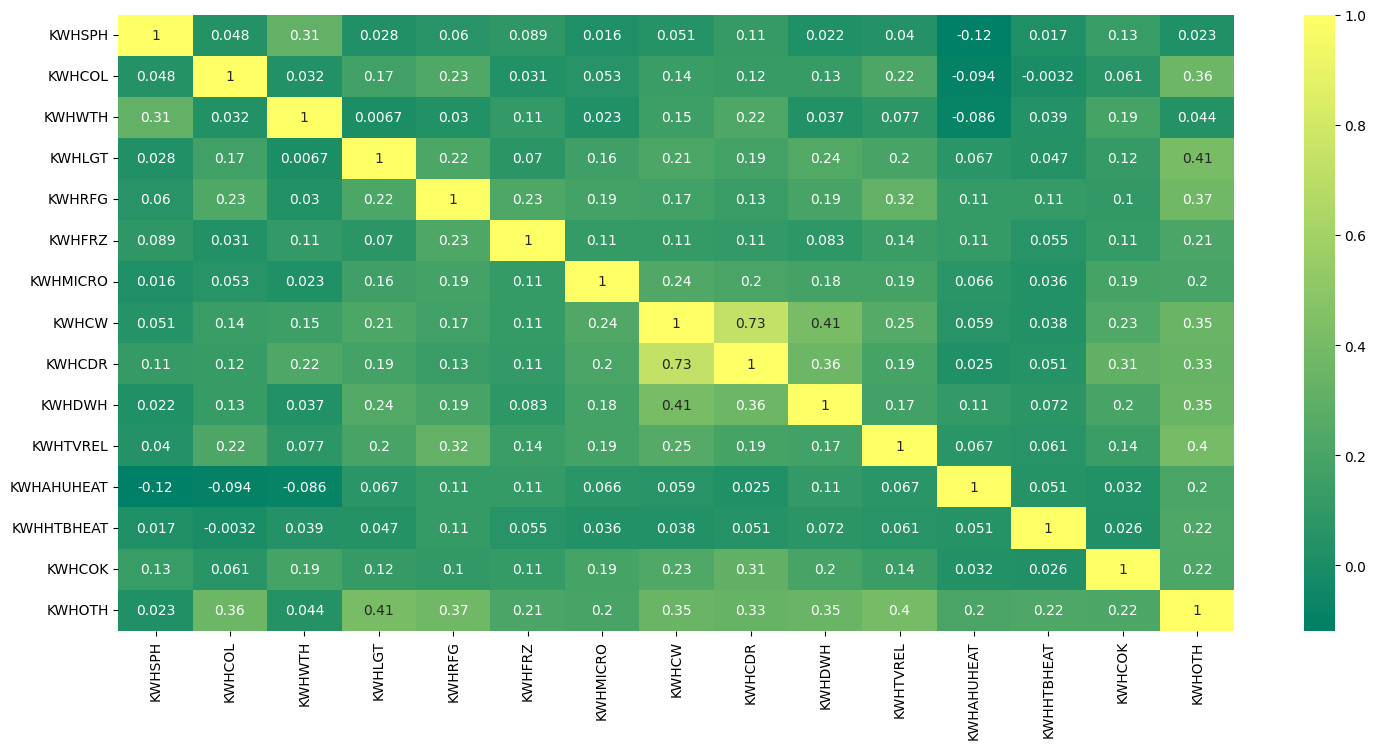

In [95]:
plt.figure(figsize=(18,8))
sns.heatmap(energy.corr(),cmap='summer',annot=True)

In [96]:
energy.corr()

,KWHSPH,KWHCOL,KWHWTH,KWHLGT,KWHRFG,KWHFRZ,KWHMICRO,KWHCW,KWHCDR,KWHDWH,KWHTVREL,KWHAHUHEAT,KWHHTBHEAT,KWHCOK,KWHOTH
KWHSPH,1.000000,0.047650,0.313669,0.027671,0.059834,0.089379,0.016089,0.051454,0.113453,0.021676,0.040119,-0.118279,0.017278,0.127084,0.022564
KWHCOL,0.047650,1.000000,0.031581,0.165281,0.234023,0.030848,0.053093,0.142513,0.123530,0.125021,0.220449,-0.093628,-0.003195,0.061185,0.358725
KWHWTH,0.313669,0.031581,1.000000,0.006669,0.030276,0.106523,0.022804,0.151954,0.224412,0.036843,0.076632,-0.085566,0.039206,0.189054,0.043833
KWHLGT,0.027671,0.165281,0.006669,1.000000,0.215663,0.069581,0.158728,0.214979,0.187195,0.243633,0.198415,0.067113,0.047295,0.115306,0.412808
KWHRFG,0.059834,0.234023,0.030276,0.215663,1.000000,0.228411,0.187420,0.167390,0.134371,0.194705,0.316353,0.110778,0.112076,0.100597,0.373383
KWHFRZ,0.089379,0.030848,0.106523,0.069581,0.228411,1.000000,0.111896,0.111281,0.105033,0.082960,0.135372,0.110856,0.054576,0.112601,0.211879
KWHMICRO,0.016089,0.053093,0.022804,0.158728,0.187420,0.111896,1.000000,0.238733,0.203719,0.180125,0.186504,0.066470,0.036198,0.188542,0.197280
KWHCW,0.051454,0.142513,0.151954,0.214979,0.167390,0.111281,0.238733,1.000000,0.732171,0.411704,0.252722,0.059128,0.038490,0.233865,0.346781
KWHCDR,0.113453,0.123530,0.224412,0.187195,0.134371,0.105033,0.203719,0.732171,1.000000,0.355144,0.189375,0.025321,0.051024,0.307884,0.333774
KWHDWH,0.021676,0.125021,0.036843,0.243633,0.194705,0.082960,0.180125,0.411704,0.355144,1.000000,0.172519,0.108395,0.072438,0.195107,0.345476


# data standardization

In [97]:
energy

,KWHSPH,KWHCOL,KWHWTH,KWHLGT,KWHRFG,KWHFRZ,KWHMICRO,KWHCW,KWHCDR,KWHDWH,KWHTVREL,KWHAHUHEAT,KWHHTBHEAT,KWHCOK,KWHOTH
0,0.00,3275.90,0.00,630.38,958.40,809.41,374.14,115.25,2717.97,365.30,649.12,309.06,0.00,0.00,8287.27
3,2994.31,1472.33,0.00,683.32,965.40,0.00,206.94,65.31,562.51,204.07,887.08,314.40,0.00,266.78,3843.17
5,0.00,7310.65,0.00,920.25,1374.54,0.00,140.43,89.14,0.00,184.83,358.34,89.56,0.00,1175.08,5666.52
6,3480.99,4838.14,0.00,419.04,707.12,0.00,154.93,51.53,800.85,103.31,947.12,270.48,0.00,385.11,5454.09
10,0.00,2365.06,0.00,259.88,1310.01,0.00,67.95,32.80,172.83,41.09,395.25,161.44,0.00,61.87,3959.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18488,0.00,3783.58,1761.98,1441.68,1887.11,0.00,87.87,91.30,808.53,108.63,635.50,0.00,1831.02,361.85,8445.46
18489,536.94,105.32,261.84,49.15,64.62,55.47,40.24,5.90,35.85,10.60,175.65,36.95,0.00,32.26,733.44
18492,617.29,748.21,0.00,130.13,610.62,0.00,43.11,0.00,250.37,0.00,277.14,850.80,0.00,211.10,2449.06
18494,1442.07,5708.15,1603.47,386.23,1225.29,915.25,68.05,32.72,171.93,38.69,268.25,27.91,0.00,128.50,8625.37


In [98]:
scaler = StandardScaler()

In [99]:
energy_scaled = scaler.fit_transform(energy.iloc[:,1:])

In [100]:
np.mean(energy_scaled),np.std(energy_scaled)

(1.628648111686736e-17, 1.0)

In [101]:
energy_scaled = pd.DataFrame(energy_scaled)

In [102]:
energy_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558


# dimensionality reduction algorithms

## pca 

In [103]:
pca_general = PCA()

In [104]:
pca_general.fit(energy_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [105]:
explained_variance = pca_general.explained_variance_ratio_

In [106]:
explained_variance

array([0.23981758, 0.10306122, 0.08322076, 0.07913004, 0.07106617,
       0.06366256, 0.05970622, 0.05694361, 0.05449912, 0.04929789,
       0.04859612, 0.0446687 , 0.0282902 , 0.01803978])

In [107]:
eigenvalues = pca_general.explained_variance_

In [108]:
eigenvalues

array([3.35771875, 1.44297424, 1.16518529, 1.1079105 , 0.99500721,
       0.89134821, 0.83595499, 0.79727531, 0.76304969, 0.69022649,
       0.68040096, 0.62541253, 0.39609497, 0.2525774 ])

In [109]:
selected_components = []

for i in eigenvalues:
    if i > 1:
        selected_components.append(i)
    
print(selected_components)

[3.3577187531248986, 1.4429742380479798, 1.1651852870965882, 1.107910503573592]


In [110]:
N_COMPONENTS = len(selected_components)

In [111]:
eigenvectors = pca_general.components_

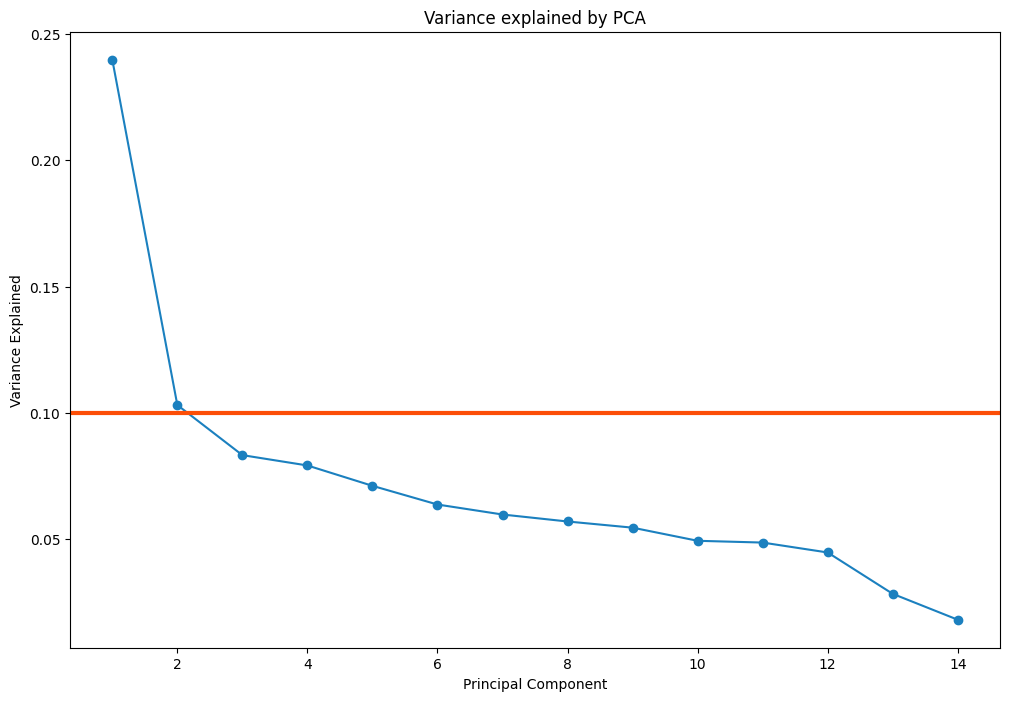

In [112]:
plt.figure(figsize=(12,8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [113]:
pca = PCA(n_components=N_COMPONENTS)

In [114]:
X_pca = pca.fit_transform(energy_scaled)

In [115]:
pd.DataFrame(X_pca).head(8)

,0,1,2,3
0,3.398848,1.381935,1.103398,-1.294155
1,0.183065,0.208283,0.400024,-0.967733
2,1.237224,0.282498,-1.256385,-0.104173
3,0.103671,0.112713,-0.703639,-0.563794
4,-1.582016,-0.673343,-0.513767,-0.218277
5,-0.055364,0.299853,-0.863017,-1.009578
6,-0.369168,-0.425922,-0.552856,-0.549690
7,-2.292098,0.219369,-0.360438,0.163878


In [116]:
pca_columns = [f'dim_{i+1}' for i in range(N_COMPONENTS)]

In [117]:
pca_data = pd.DataFrame(X_pca, columns=pca_columns)

In [118]:
pca_data

,dim_1,dim_2,dim_3,dim_4
0,3.398848,1.381935,1.103398,-1.294155
1,0.183065,0.208283,0.400024,-0.967733
2,1.237224,0.282498,-1.256385,-0.104173
3,0.103671,0.112713,-0.703639,-0.563794
4,-1.582016,-0.673343,-0.513767,-0.218277
...,...,...,...,...
12314,1.618744,-0.921993,-0.419190,0.849039
12315,-3.431146,0.525219,-0.025194,-0.236123
12316,-2.433247,-0.351460,1.154003,-0.336915
12317,-0.411450,-1.111840,-1.027603,1.459802


## t-SNE

In [119]:
tsne = TSNE(n_components=3,random_state=42)

In [120]:
X_tsne = tsne.fit_transform(energy_scaled)

In [121]:
tsne_columns = [f'dim_{i+1}' for i in range(3)]

In [122]:
tsne_data = pd.DataFrame(X_tsne, columns=tsne_columns)

In [123]:
tsne_data

,dim_1,dim_2,dim_3
0,23.750866,1.543610,5.368473
1,1.263874,0.421233,-13.771427
2,8.888514,9.339042,-3.745771
3,5.155738,-6.376481,-15.368911
4,-16.348198,5.181808,3.439113
...,...,...,...
12314,12.324662,-19.922108,16.175945
12315,-34.640308,0.554865,-5.345085
12316,-25.454924,-11.150043,10.255588
12317,-0.342241,16.035583,16.816412


## umap

In [124]:
umap = umap.UMAP(n_components=3,random_state=42)

In [125]:
X_umap = umap.fit_transform(energy_scaled)

In [126]:
umap_columns = [f'dim_{i+1}' for i in range(3)]

In [127]:
umap_data = pd.DataFrame(X_umap, columns=umap_columns)

# clustering algorithms

## k-means 

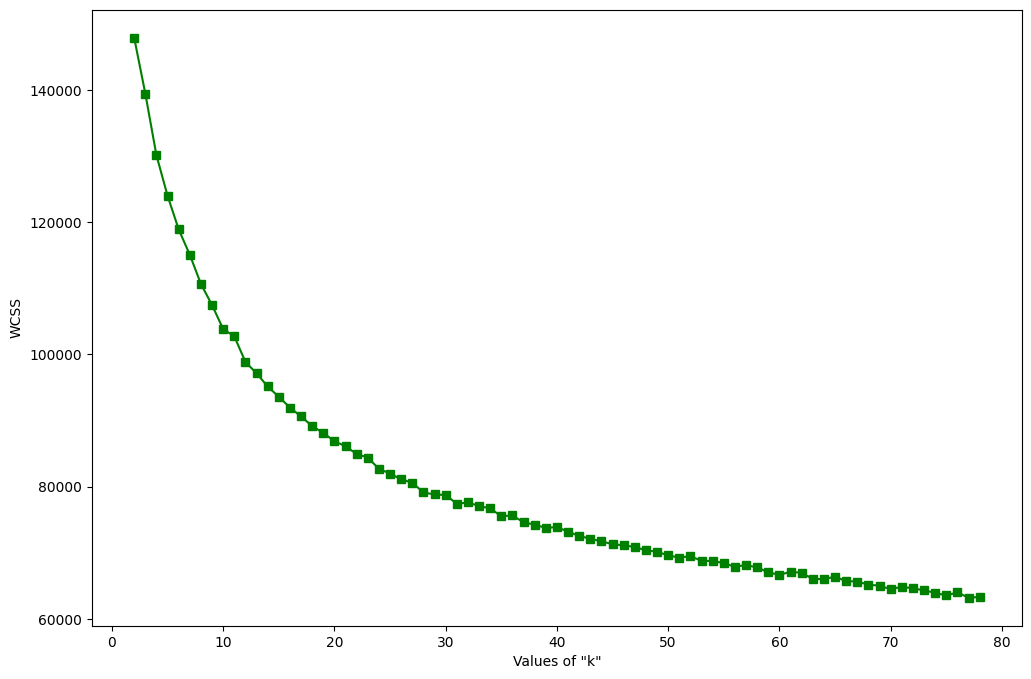

In [128]:
limit = int((energy_scaled.shape[0]//2)**0.5)
wcss = {}

for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(energy_scaled)
    wcss[k] = model.inertia_
    
plt.figure(figsize=(12,8))
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [129]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [130]:
kmeans.fit(energy_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [131]:
df_kmeans = energy_scaled.copy()

In [132]:
df_kmeans['k_means'] = kmeans.labels_

In [133]:
df_kmeans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,k_means
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,3
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,4
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,4
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,4
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,2
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,1
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,1
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,4


In [134]:
df_kmeans['k_means'].unique()

array([3, 4, 1, 0, 2])

In [135]:
df_kmeans.groupby(df_kmeans['k_means']).mean() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
k_means,,,,,,,,,,,,,,
0,0.008264,1.483683,-0.083416,-0.082779,0.239080,0.073883,0.227309,0.357880,0.090568,0.091017,-0.262984,-0.153983,0.502632,-0.027424
1,-0.321678,-0.295532,-0.336590,-0.457860,-0.322037,-0.355045,-0.456016,-0.426106,-0.446664,-0.453880,-0.145863,-0.163961,-0.361341,-0.548061
2,-0.039546,0.188195,0.270870,0.560676,0.248358,0.183227,0.141702,0.185504,0.385103,0.309082,0.225627,5.256952,0.127739,1.202517
3,0.463850,0.086598,1.095666,0.577804,0.280971,0.833976,2.141011,2.190678,1.350024,0.779490,0.240569,-0.121088,0.971374,1.274983
4,0.411742,-0.433863,0.290079,0.601137,0.294164,0.306235,0.037265,-0.108317,0.290172,0.462662,0.312611,-0.142039,0.029989,0.465915


### k-means with pca

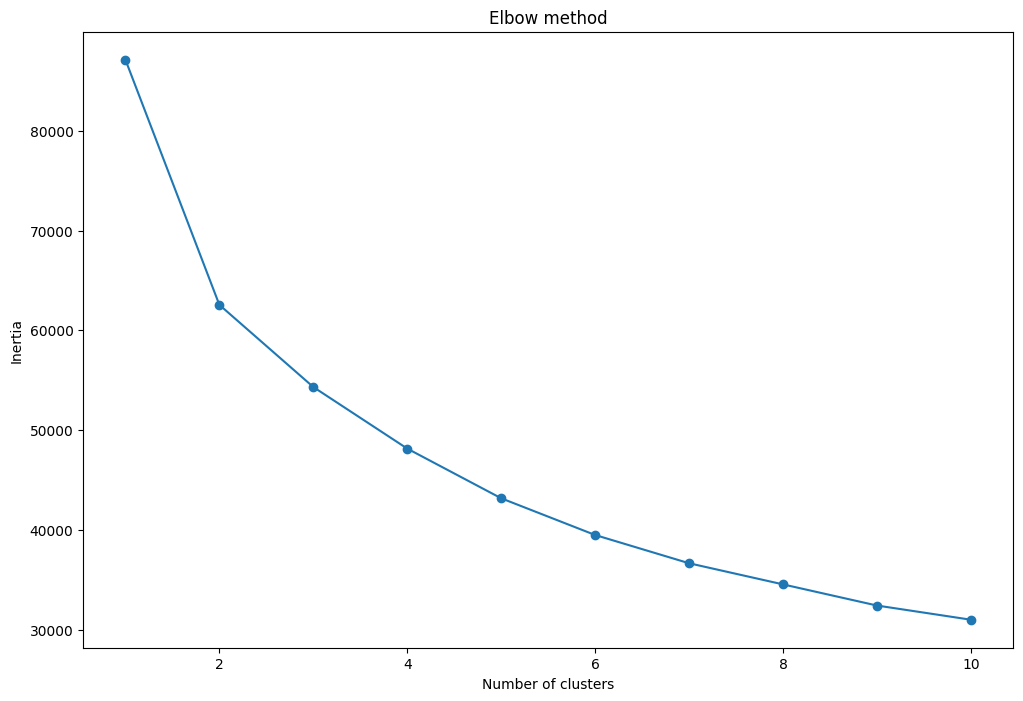

In [136]:
data = X_pca
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [137]:
kmeans_pca = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [138]:
kmeans_pca.fit(X_pca)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [139]:
df_pca_kmeans = energy_scaled.copy()

In [140]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [141]:
df_pca_kmeans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,kmeans_pca
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,2
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,0
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,1
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,1
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,1
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,3
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,3
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,1


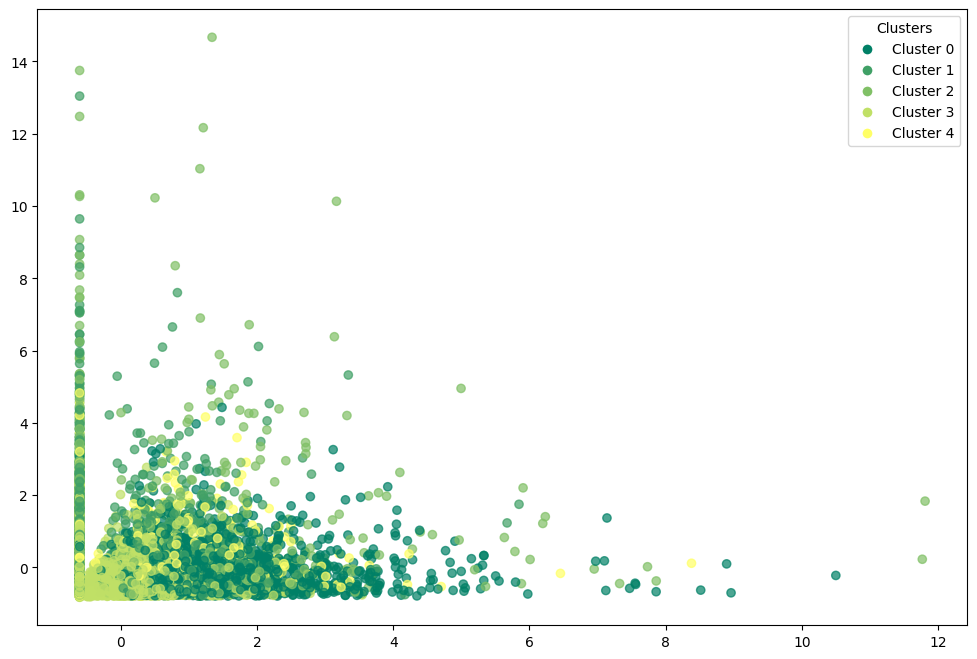

In [142]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_kmeans.iloc[:, 1], df_pca_kmeans.iloc[:, 2], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [143]:
df_pca_kmeans.groupby(df_pca_kmeans['kmeans_pca']).mean() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
kmeans_pca,,,,,,,,,,,,,,
0,-0.128689,0.754248,-0.125038,-0.150975,0.086181,0.181777,0.439358,0.530865,0.221926,-0.004671,-0.283024,-0.132673,0.544404,-0.040005
1,1.202147,-0.222676,0.599500,0.673182,-0.110876,0.036404,0.008588,-0.124071,0.214148,0.715088,-0.251169,-0.084724,-0.154262,0.672387
2,0.493208,0.315459,1.199221,0.692583,0.331761,0.967256,2.253420,2.289627,1.544889,0.945016,0.287109,0.131587,1.079048,1.453936
3,-0.337963,-0.277001,-0.336271,-0.430255,-0.322514,-0.342968,-0.505880,-0.486953,-0.448473,-0.439189,-0.151994,-0.158509,-0.395541,-0.552607
4,-0.291521,-0.223938,0.099067,0.661622,1.011212,0.399797,-0.089046,-0.175965,0.196137,0.245571,1.251605,0.870292,0.119559,0.524141


### k-means with t-SNE

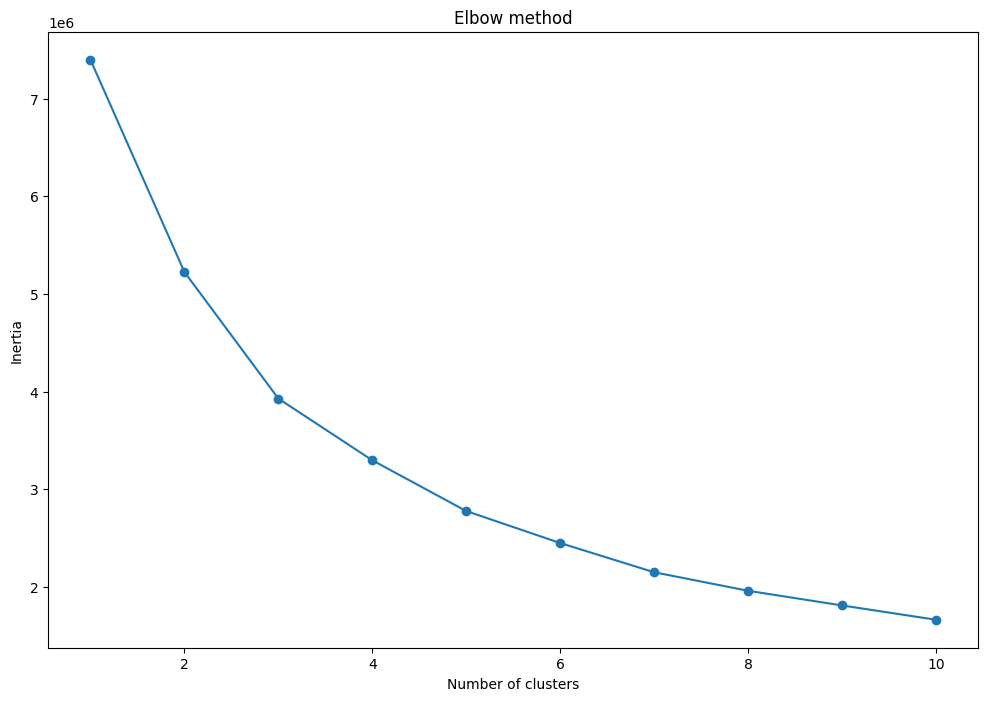

In [144]:
data = X_tsne
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [145]:
kmeans_tsne = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [146]:
kmeans_tsne.fit(X_tsne)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [147]:
df_tsne_kmeans = energy_scaled.copy()

In [148]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [149]:
df_tsne_kmeans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,kmeans_tsne
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,4
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,2
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,0
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,2
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,1
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,3
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,3
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,0


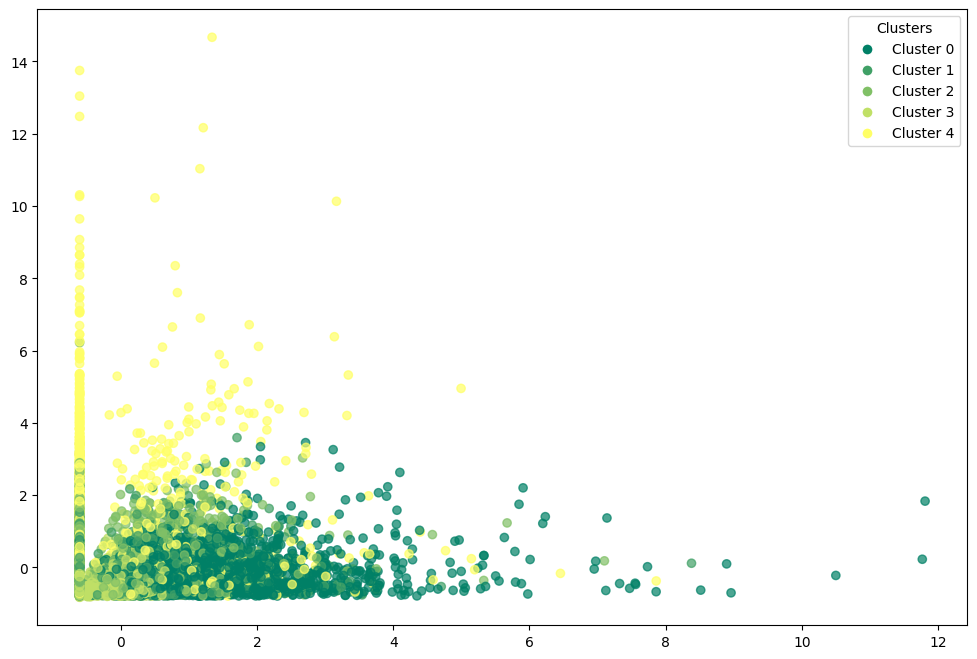

In [150]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 1], df_tsne_kmeans.iloc[:, 2], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [151]:
df_tsne_kmeans.groupby(df_tsne_kmeans['kmeans_tsne']).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
kmeans_tsne,,,,,,,,,,,,,,
0,-0.088272,1.070761,-0.201113,-0.126046,0.204250,-0.025278,0.121611,0.235468,0.002694,-0.058933,-0.307153,-0.171818,0.494649,-0.136675
1,-0.227126,-0.370450,-0.161499,0.256043,0.633923,-0.109963,-0.143785,-0.333990,-0.025669,0.038897,0.664250,0.247915,-0.272028,0.057301
2,0.821656,-0.094992,0.071663,0.071683,-0.535023,-0.137939,-0.157563,-0.110626,0.071501,0.001109,-0.407920,-0.169016,-0.087901,-0.036159
3,-0.506220,-0.388949,-0.422412,-0.604508,-0.553133,-0.394469,-0.628335,-0.586110,-0.664898,-0.605735,-0.193894,-0.181503,-0.498210,-0.711552
4,0.222411,-0.257218,0.847459,0.459472,0.100576,0.736811,0.892732,0.902866,0.723203,0.711103,0.131101,0.254585,0.407097,0.932615


### k-means with umap

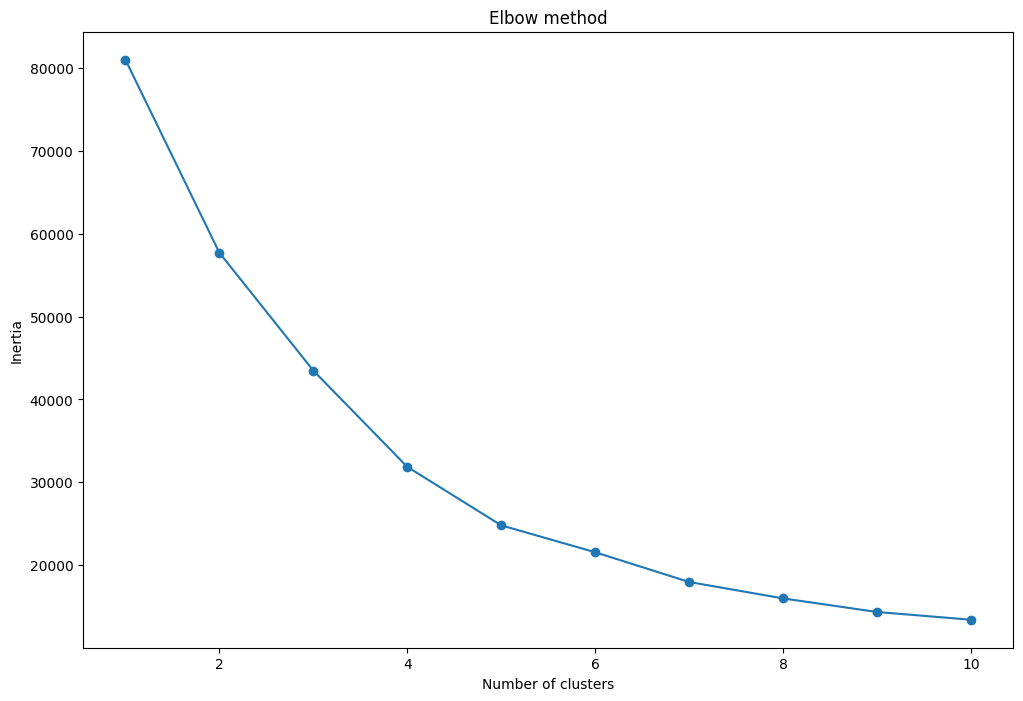

In [152]:
data = X_umap
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [153]:
kmeans_umap = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [154]:
kmeans_umap.fit(X_umap)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [155]:
df_umap_kmeans = energy_scaled.copy()

In [156]:
df_umap_kmeans['kmeans_umap'] = kmeans_umap.labels_

In [157]:
df_umap_kmeans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,kmeans_umap
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,2
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,2
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,2
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,2
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,4
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,1
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,1
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,3


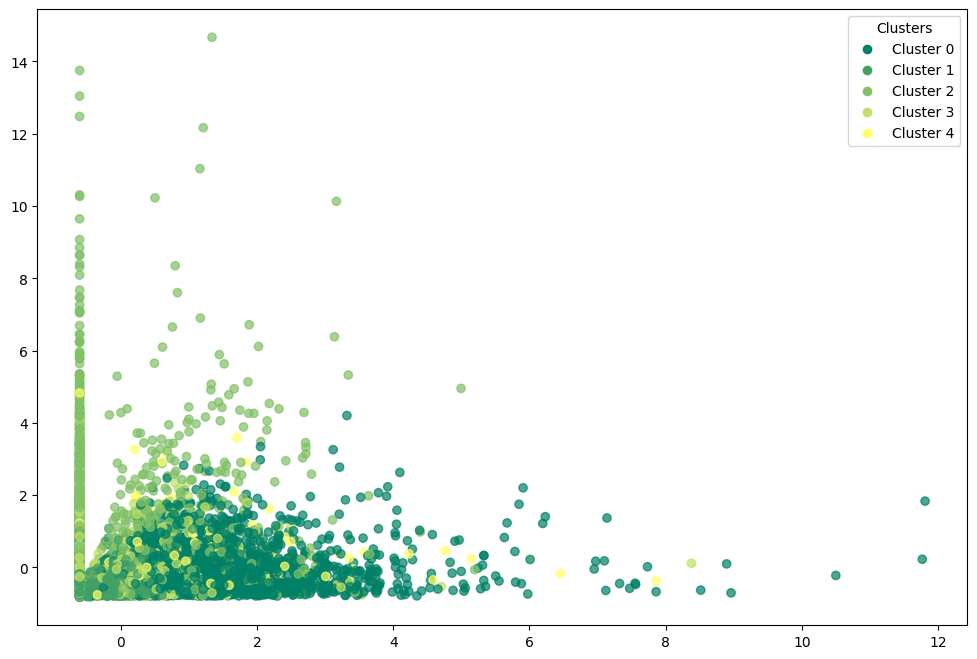

In [158]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_kmeans.iloc[:, 1], df_umap_kmeans.iloc[:, 2], 
                      c=df_umap_kmeans['kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_kmeans['kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

## Birch

In [159]:
birch = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [160]:
birch.fit(energy_scaled)

,threshold,1.5
,branching_factor,50
,n_clusters,5
,compute_labels,True
,copy,'deprecated'


In [161]:
df_birch = energy_scaled.copy()

In [162]:
df_birch['birch'] = birch.labels_

In [163]:
df_birch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,birch
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,2
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,1
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,1
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,2
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,3
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,1
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,1
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,1


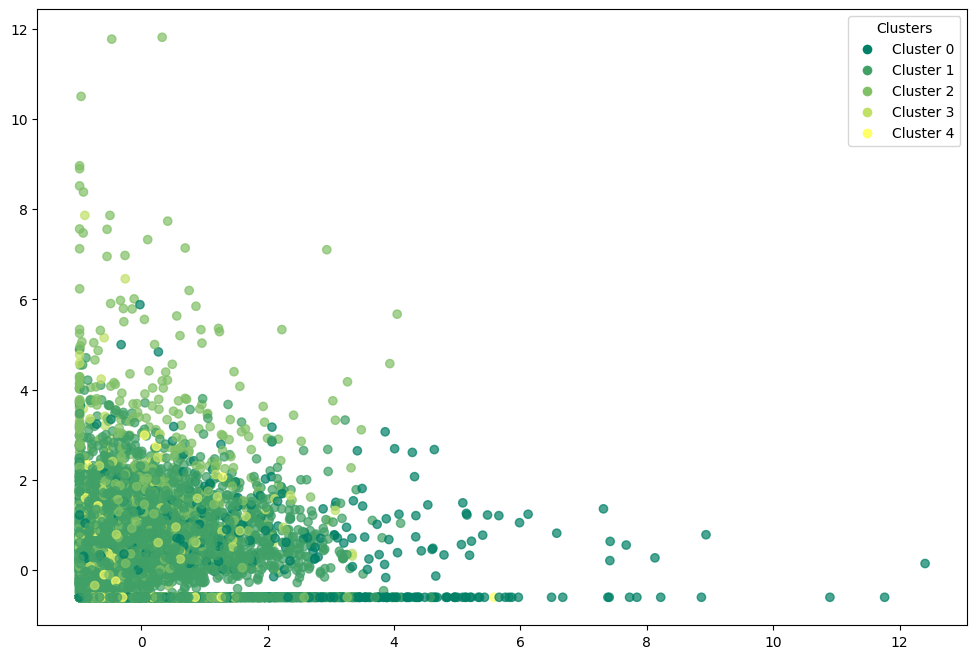

In [164]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_birch.iloc[:, 0], df_birch.iloc[:, 1], 
                      c=df_birch['birch'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_birch['birch'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### Birch with pca

In [165]:
birch_pca = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [166]:
birch_pca.fit(X_pca)

,threshold,1.5
,branching_factor,50
,n_clusters,5
,compute_labels,True
,copy,'deprecated'


In [167]:
df_pca_birch = energy_scaled.copy()

In [168]:
df_pca_birch["birch_pca"] = birch_pca.labels_

In [169]:
df_pca_birch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,birch_pca
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,2
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,0
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,0
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,0
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,0
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,0
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,0
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,0


### Birch with t-SNE

In [170]:
birch_tsne = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [171]:
birch_tsne.fit(X_tsne)

,threshold,1.5
,branching_factor,50
,n_clusters,5
,compute_labels,True
,copy,'deprecated'


In [172]:
df_tsne_birch = energy_scaled.copy()

In [173]:
df_tsne_birch['birch_tsne'] = birch_tsne.labels_

In [174]:
df_tsne_birch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,birch_tsne
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,4
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,0
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,0
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,0
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,2
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,3
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,1
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,1


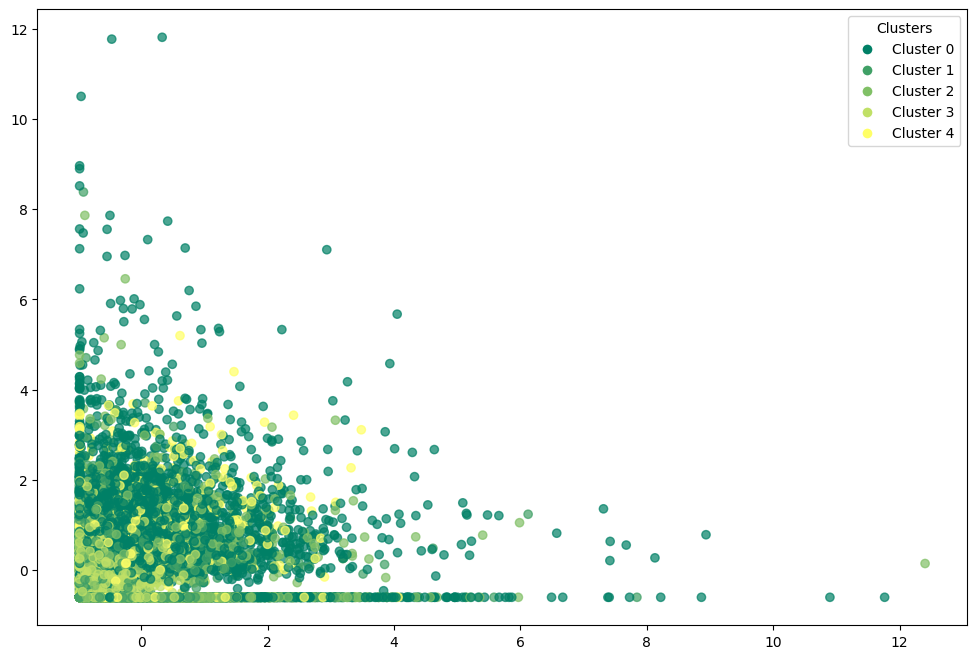

In [175]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_birch.iloc[:, 0], df_tsne_birch.iloc[:, 1], 
                      c=df_tsne_birch['birch_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_birch['birch_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### Birch with umap

In [176]:
birch_umap = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [177]:
birch_umap.fit(X_umap)

,threshold,1.5
,branching_factor,50
,n_clusters,5
,compute_labels,True
,copy,'deprecated'


In [178]:
df_umap_birch = energy_scaled.copy()

In [179]:
df_umap_birch['birch_umap'] = birch_umap.labels_

In [180]:
df_umap_birch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,birch_umap
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,0
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,0
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,0
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,0
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,3
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,4
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,4
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,2


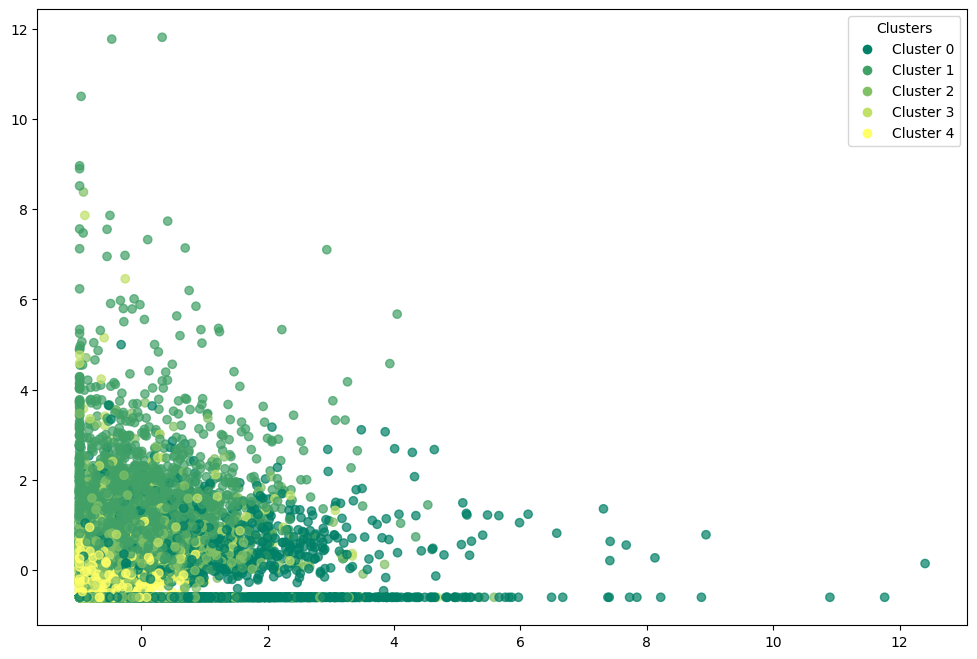

In [181]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_birch.iloc[:, 0], df_umap_birch.iloc[:, 1], 
                      c=df_umap_birch['birch_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_birch['birch_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

## GMM - Gaussian Mixture Models

In [182]:
gmm = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [183]:
gmm.fit(energy_scaled)

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'k-means++'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [184]:
df_gmm = energy_scaled.copy()

In [185]:
df_gmm['gmm'] = gmm.predict(energy_scaled)

In [186]:
df_gmm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,gmm
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,4
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,1
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,1
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,1
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,0
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,4
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,1
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,4


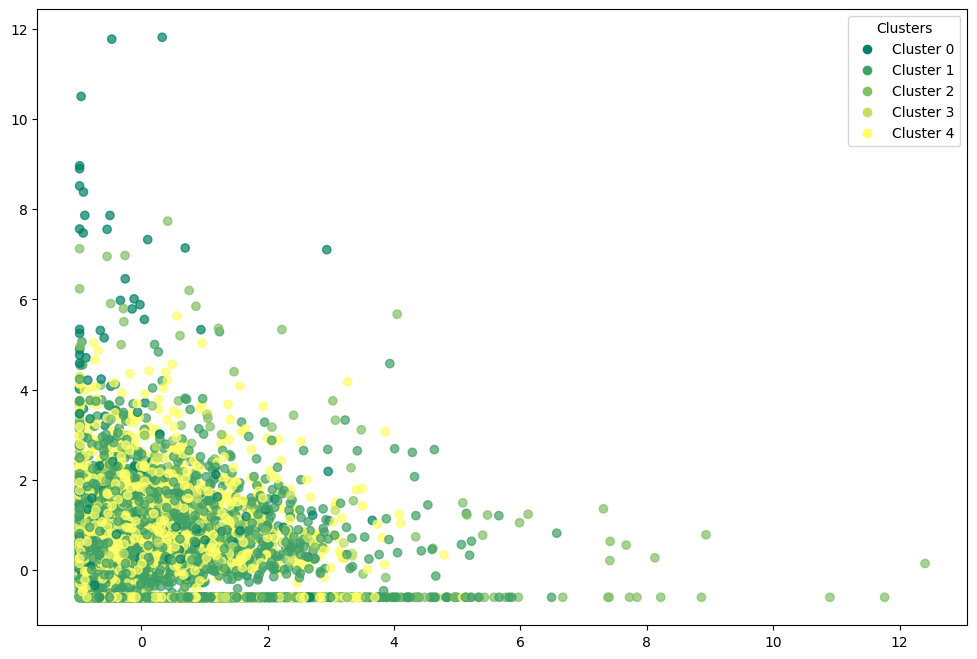

In [187]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['gmm'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_gmm['gmm'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### GMM with pca

In [188]:
gmm_pca = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [189]:
gmm_pca.fit(X_pca)

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'k-means++'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [190]:
df_pca_gmm = energy_scaled.copy()

In [191]:
df_pca_gmm['gmm_pca'] = gmm_pca.predict(X_pca)

In [192]:
df_pca_gmm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,gmm_pca
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,4
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,3
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,4
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,1
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,0
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,3
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,1
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,0


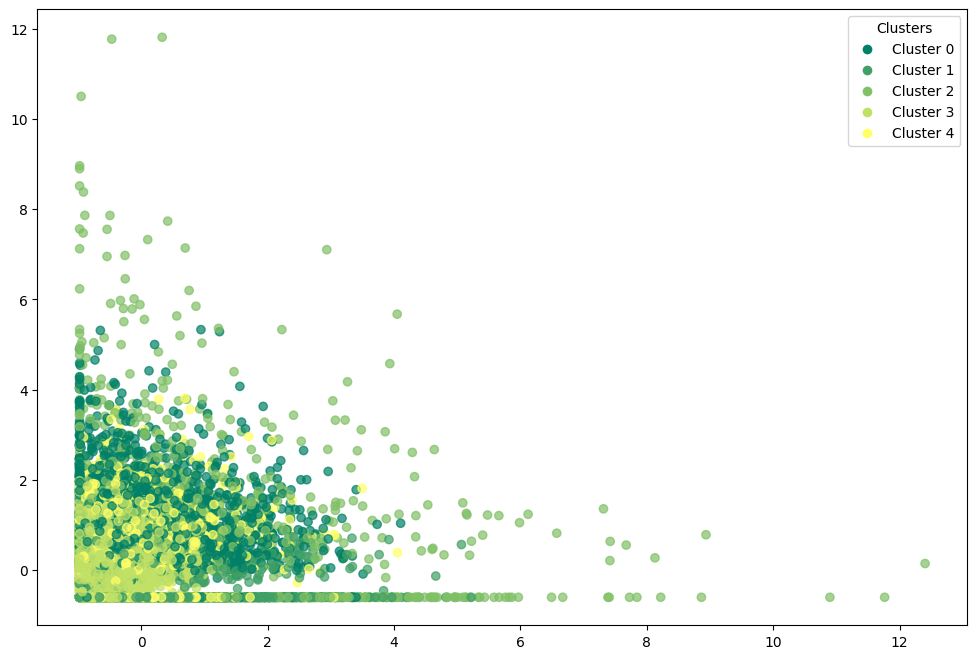

In [193]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['gmm_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_gmm['gmm_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### GMM with t-SNE

In [194]:
gmm_tsne = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [195]:
gmm_tsne.fit(X_tsne)

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'k-means++'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [196]:
df_tsne_gmm = energy_scaled.copy()

In [197]:
df_tsne_gmm['gmm_tsne'] = gmm_tsne.predict(X_tsne)

In [198]:
df_tsne_gmm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,gmm_tsne
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,4
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,3
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,4
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,3
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,4
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,3
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,1
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,0


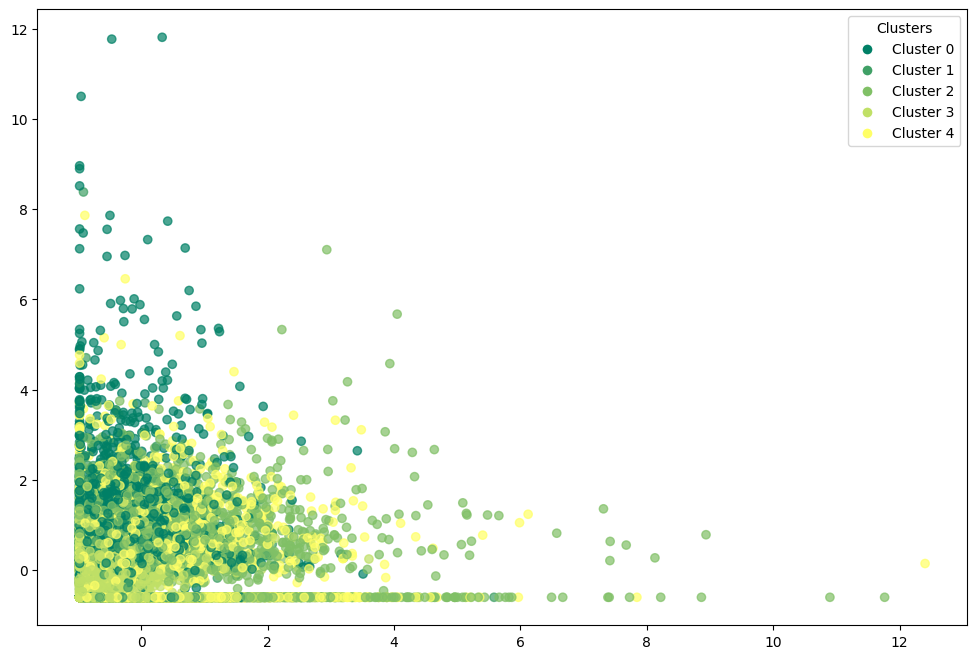

In [199]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['gmm_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_gmm['gmm_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### GMM with umap

In [200]:
gmm_umap = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [201]:
gmm_umap.fit(X_umap)

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'k-means++'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [202]:
df_umap_gmm = energy_scaled.copy()

In [203]:
df_umap_gmm['gmm_umap'] = gmm_umap.predict(X_umap)

In [204]:
df_umap_gmm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,gmm_umap
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,2
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,2
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,2
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,1
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,4
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,1
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,3
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,0


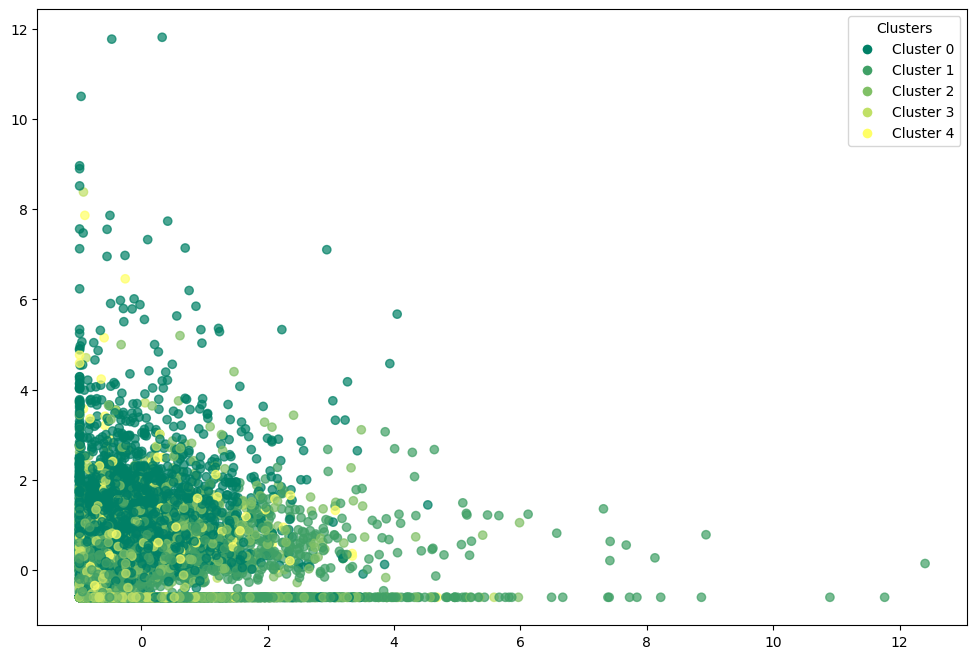

In [205]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['gmm_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_gmm['gmm_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

## pam

In [206]:
initial_medoids = np.random.choice(len(energy_scaled),5,replace=False)

In [207]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [208]:
pam = kmedoids(energy_scaled.values.tolist(),initial_medoids,metric=metric)

In [209]:
pam.process()

In [210]:
clusters = pam.get_clusters()

In [211]:
medoids = pam.get_medoids()

In [212]:
labels = np.zeros(len(energy_scaled))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [213]:
df_pam = energy_scaled.copy()

In [214]:
df_pam['pam'] = labels

In [215]:
df_pam

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,pam
0,0.407340,-0.603991,-0.153638,-0.028886,1.443054,3.404764,0.901621,3.458697,2.641852,-0.058599,0.037964,-0.188621,-0.887517,0.455298,4.0
1,-0.352249,-0.603991,-0.096994,-0.015222,-0.704074,1.225422,-0.096741,-0.021478,1.041026,0.391960,0.052402,-0.188621,0.172597,-0.573374,0.0
2,2.106609,-0.603991,0.156512,0.783418,-0.704074,0.358509,0.379650,-0.929698,0.849995,-0.609169,-0.555518,-0.188621,3.781945,-0.151325,0.0
3,1.065290,-0.603991,-0.379763,-0.519384,-0.704074,0.547506,-0.372221,0.363343,0.040597,0.505641,-0.066348,-0.188621,0.642810,-0.200496,0.0
4,0.023731,-0.603991,-0.550058,0.657456,-0.704074,-0.586220,-0.746656,-0.650650,-0.577175,-0.539283,-0.361169,-0.188621,-0.641662,-0.546487,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0.621153,0.242811,0.714421,1.783953,-0.704074,-0.326576,0.422831,0.375743,0.093418,-0.084387,-0.797669,3.998717,0.550381,0.491914,3.0
12315,-0.927977,-0.478152,-0.775530,-1.773543,-0.556928,-0.947402,-1.284421,-0.871816,-0.879905,-0.955078,-0.697764,-0.188621,-0.759324,-1.293181,2.0
12316,-0.657219,-0.603991,-0.688885,-0.707752,-0.704074,-0.909993,-1.402369,-0.525455,-0.985151,-0.762915,1.502714,-0.188621,-0.048661,-0.896068,2.0
12317,1.431702,0.166632,-0.414868,0.492082,1.723817,-0.584917,-0.748256,-0.652103,-0.601004,-0.779747,-0.722206,-0.188621,-0.376892,0.533558,1.0


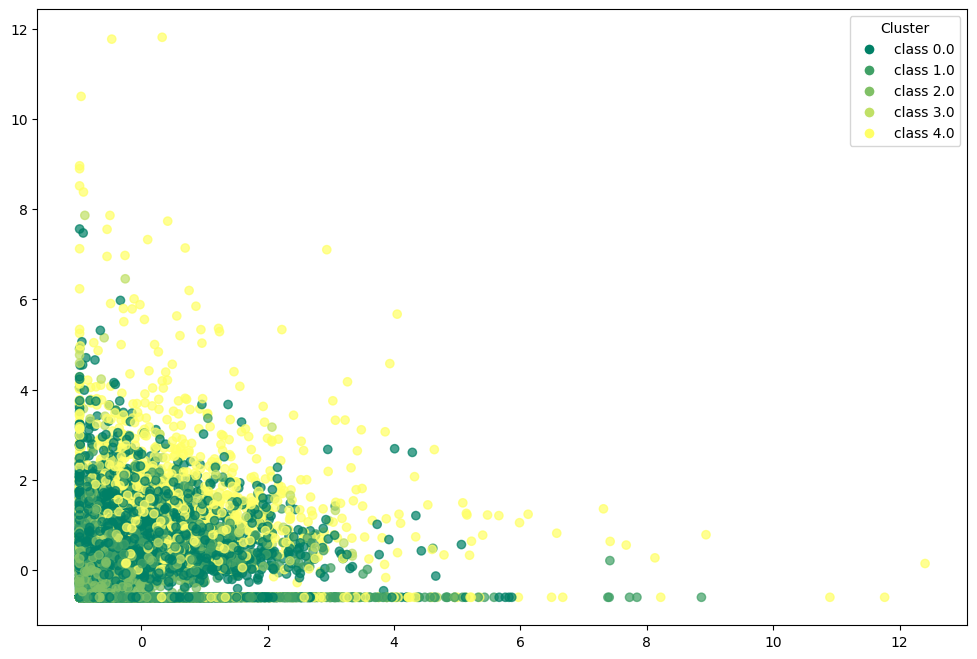

In [216]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['pam'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['pam'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

### pam with pca

In [217]:
initial_medoids = np.random.choice(len(X_pca),5,replace=False)

In [218]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [219]:
pam_pca = kmedoids(X_pca,initial_medoids,metric=metric)

In [ ]:
pam_pca.process()

In [ ]:
clusters = pam_pca.get_clusters()

In [ ]:
medoids = pam_pca.get_medoids()

In [ ]:
labels = np.zeros(len(X_pca))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [ ]:
df_pam_pca = energy_scaled.copy()

In [ ]:
df_pam_pca['pam_pca'] = labels

In [ ]:
df_pam_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,pam_pca
0,-0.253837,-0.393062,-0.341056,0.328680,-0.377747,0.043343,0.254063,0.434229,-0.551603,-0.215340,-0.238986,-0.536079,0.057203,-0.584972,-0.923455,3.0
1,-0.253837,-0.393062,-0.341056,0.328680,-0.348722,-0.790829,-0.592363,-0.463581,-0.434907,1.352920,-0.710625,-0.536079,0.057203,0.076626,0.497078,4.0
2,2.741435,-0.393062,-0.341056,0.328680,-0.235301,1.366570,-0.592363,-0.321822,-0.293931,-0.876253,2.206275,-0.536079,-0.526926,-0.584972,1.680856,2.0
3,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,-1.012677,-0.592363,-0.222262,-0.221171,-0.876253,-0.681451,-0.536079,0.057203,-0.584972,-0.743070,3.0
4,-0.253837,-0.393062,-0.341056,-0.978653,-0.103512,-0.632631,0.078046,-0.107236,-0.448818,-0.876253,-1.110300,-0.388051,-0.526926,5.700208,-1.464610,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,4.239070,-0.393062,0.985690,0.328680,-0.215464,0.571757,-0.592363,0.203763,-0.081153,-0.876253,0.568676,-0.388051,0.057203,0.076626,3.033745,2.0
173,-0.253837,-0.393062,0.985690,-0.978653,-0.377747,-0.102751,-0.592363,-0.469936,0.030917,-0.650026,0.371194,-0.388051,-0.332217,-0.584972,-0.359751,4.0
174,-0.253837,1.623517,-0.341056,0.328680,0.056303,-0.242116,0.146884,-0.712831,2.433124,1.885351,-0.255488,-0.536079,-0.526926,-0.584972,-0.371025,4.0
175,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,0.666041,-0.592363,-0.619994,-0.175921,0.531241,0.173905,-0.536079,-0.332217,-0.584972,0.215227,4.0


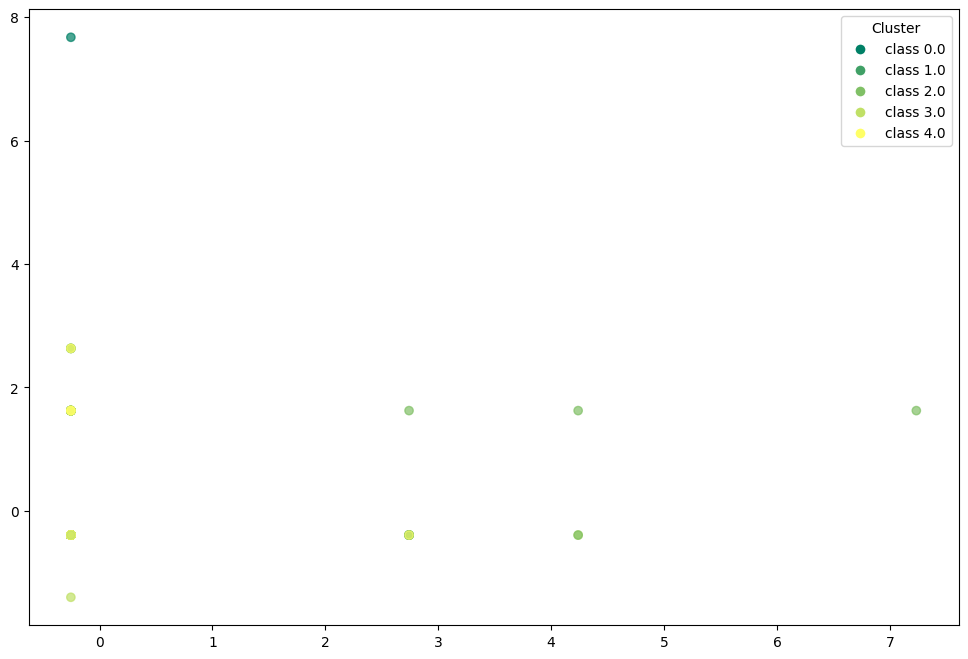

In [ ]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['pam_pca'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['pam_pca'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

### pam with t-SNE

In [ ]:
initial_medoids = np.random.choice(len(X_tsne),5,replace=False)

In [ ]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [ ]:
pam_tsne = kmedoids(X_tsne,initial_medoids,metric=metric)

In [ ]:
pam_tsne.process()

In [ ]:
clusters = pam_tsne.get_clusters()

In [ ]:
medoids = pam_tsne.get_medoids()

In [ ]:
labels = np.zeros(len(X_tsne))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [ ]:
df_pam_tsne = energy_scaled.copy()

In [ ]:
df_pam_tsne['pam_tsne'] = labels

In [ ]:
df_pam_tsne

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,pam_tsne
0,-0.253837,-0.393062,-0.341056,0.328680,-0.377747,0.043343,0.254063,0.434229,-0.551603,-0.215340,-0.238986,-0.536079,0.057203,-0.584972,-0.923455,2.0
1,-0.253837,-0.393062,-0.341056,0.328680,-0.348722,-0.790829,-0.592363,-0.463581,-0.434907,1.352920,-0.710625,-0.536079,0.057203,0.076626,0.497078,1.0
2,2.741435,-0.393062,-0.341056,0.328680,-0.235301,1.366570,-0.592363,-0.321822,-0.293931,-0.876253,2.206275,-0.536079,-0.526926,-0.584972,1.680856,4.0
3,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,-1.012677,-0.592363,-0.222262,-0.221171,-0.876253,-0.681451,-0.536079,0.057203,-0.584972,-0.743070,2.0
4,-0.253837,-0.393062,-0.341056,-0.978653,-0.103512,-0.632631,0.078046,-0.107236,-0.448818,-0.876253,-1.110300,-0.388051,-0.526926,5.700208,-1.464610,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,4.239070,-0.393062,0.985690,0.328680,-0.215464,0.571757,-0.592363,0.203763,-0.081153,-0.876253,0.568676,-0.388051,0.057203,0.076626,3.033745,4.0
173,-0.253837,-0.393062,0.985690,-0.978653,-0.377747,-0.102751,-0.592363,-0.469936,0.030917,-0.650026,0.371194,-0.388051,-0.332217,-0.584972,-0.359751,2.0
174,-0.253837,1.623517,-0.341056,0.328680,0.056303,-0.242116,0.146884,-0.712831,2.433124,1.885351,-0.255488,-0.536079,-0.526926,-0.584972,-0.371025,3.0
175,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,0.666041,-0.592363,-0.619994,-0.175921,0.531241,0.173905,-0.536079,-0.332217,-0.584972,0.215227,0.0


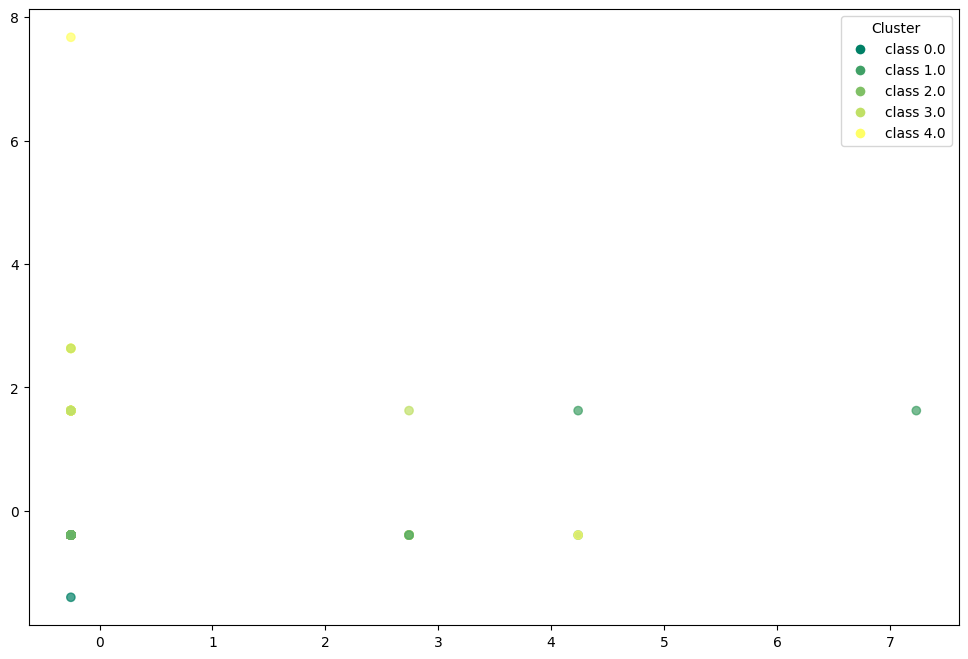

In [ ]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['pam_tsne'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['pam_tsne'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

### pam with umap

In [ ]:
initial_medoids = np.random.choice(len(X_umap),5,replace=False)

In [ ]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [ ]:
pam_umap = kmedoids(X_umap,initial_medoids,metric=metric)

In [ ]:
pam_umap.process()

In [ ]:
clusters = pam_umap.get_clusters()

In [ ]:
medoids = pam_umap.get_medoids()

In [ ]:
labels = np.zeros(len(X_umap))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [ ]:
df_pam_umap = energy_scaled.copy()

In [ ]:
df_pam_umap['pam_umap'] = labels

In [ ]:
df_pam_umap

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,pam_umap
0,-0.253837,-0.393062,-0.341056,0.328680,-0.377747,0.043343,0.254063,0.434229,-0.551603,-0.215340,-0.238986,-0.536079,0.057203,-0.584972,-0.923455,2.0
1,-0.253837,-0.393062,-0.341056,0.328680,-0.348722,-0.790829,-0.592363,-0.463581,-0.434907,1.352920,-0.710625,-0.536079,0.057203,0.076626,0.497078,3.0
2,2.741435,-0.393062,-0.341056,0.328680,-0.235301,1.366570,-0.592363,-0.321822,-0.293931,-0.876253,2.206275,-0.536079,-0.526926,-0.584972,1.680856,2.0
3,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,-1.012677,-0.592363,-0.222262,-0.221171,-0.876253,-0.681451,-0.536079,0.057203,-0.584972,-0.743070,1.0
4,-0.253837,-0.393062,-0.341056,-0.978653,-0.103512,-0.632631,0.078046,-0.107236,-0.448818,-0.876253,-1.110300,-0.388051,-0.526926,5.700208,-1.464610,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,4.239070,-0.393062,0.985690,0.328680,-0.215464,0.571757,-0.592363,0.203763,-0.081153,-0.876253,0.568676,-0.388051,0.057203,0.076626,3.033745,4.0
173,-0.253837,-0.393062,0.985690,-0.978653,-0.377747,-0.102751,-0.592363,-0.469936,0.030917,-0.650026,0.371194,-0.388051,-0.332217,-0.584972,-0.359751,1.0
174,-0.253837,1.623517,-0.341056,0.328680,0.056303,-0.242116,0.146884,-0.712831,2.433124,1.885351,-0.255488,-0.536079,-0.526926,-0.584972,-0.371025,4.0
175,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,0.666041,-0.592363,-0.619994,-0.175921,0.531241,0.173905,-0.536079,-0.332217,-0.584972,0.215227,2.0


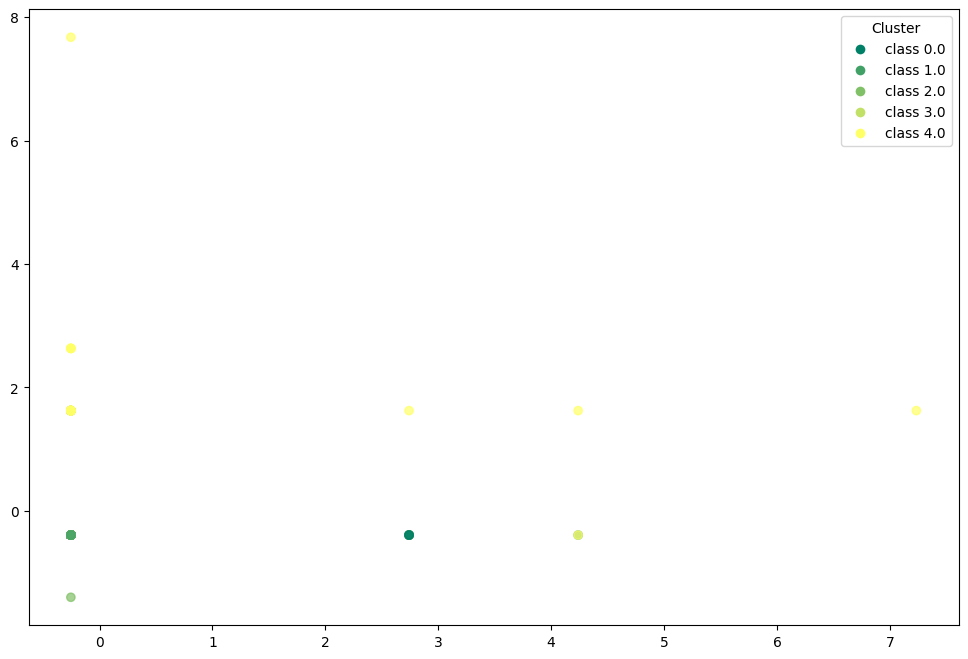

In [ ]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['pam_umap'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['pam_umap'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

## spectral clustering

In [ ]:
spectral_clustering = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [ ]:
spectral_clustering.fit(energy_scaled)

,n_clusters,5
,eigen_solver,None
,n_components,None
,random_state,None
,n_init,10
,gamma,1.0
,affinity,'nearest_neighbors'
,n_neighbors,10
,eigen_tol,'auto'
,assign_labels,'kmeans'
,degree,3


In [ ]:
df_spectral = energy_scaled.copy()

In [ ]:
df_spectral['spectral_clustering'] = spectral_clustering.labels_

In [ ]:
df_spectral

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,spectral_clustering
0,-0.253837,-0.393062,-0.341056,0.328680,-0.377747,0.043343,0.254063,0.434229,-0.551603,-0.215340,-0.238986,-0.536079,0.057203,-0.584972,-0.923455,4
1,-0.253837,-0.393062,-0.341056,0.328680,-0.348722,-0.790829,-0.592363,-0.463581,-0.434907,1.352920,-0.710625,-0.536079,0.057203,0.076626,0.497078,4
2,2.741435,-0.393062,-0.341056,0.328680,-0.235301,1.366570,-0.592363,-0.321822,-0.293931,-0.876253,2.206275,-0.536079,-0.526926,-0.584972,1.680856,0
3,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,-1.012677,-0.592363,-0.222262,-0.221171,-0.876253,-0.681451,-0.536079,0.057203,-0.584972,-0.743070,1
4,-0.253837,-0.393062,-0.341056,-0.978653,-0.103512,-0.632631,0.078046,-0.107236,-0.448818,-0.876253,-1.110300,-0.388051,-0.526926,5.700208,-1.464610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,4.239070,-0.393062,0.985690,0.328680,-0.215464,0.571757,-0.592363,0.203763,-0.081153,-0.876253,0.568676,-0.388051,0.057203,0.076626,3.033745,0
173,-0.253837,-0.393062,0.985690,-0.978653,-0.377747,-0.102751,-0.592363,-0.469936,0.030917,-0.650026,0.371194,-0.388051,-0.332217,-0.584972,-0.359751,1
174,-0.253837,1.623517,-0.341056,0.328680,0.056303,-0.242116,0.146884,-0.712831,2.433124,1.885351,-0.255488,-0.536079,-0.526926,-0.584972,-0.371025,3
175,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,0.666041,-0.592363,-0.619994,-0.175921,0.531241,0.173905,-0.536079,-0.332217,-0.584972,0.215227,0


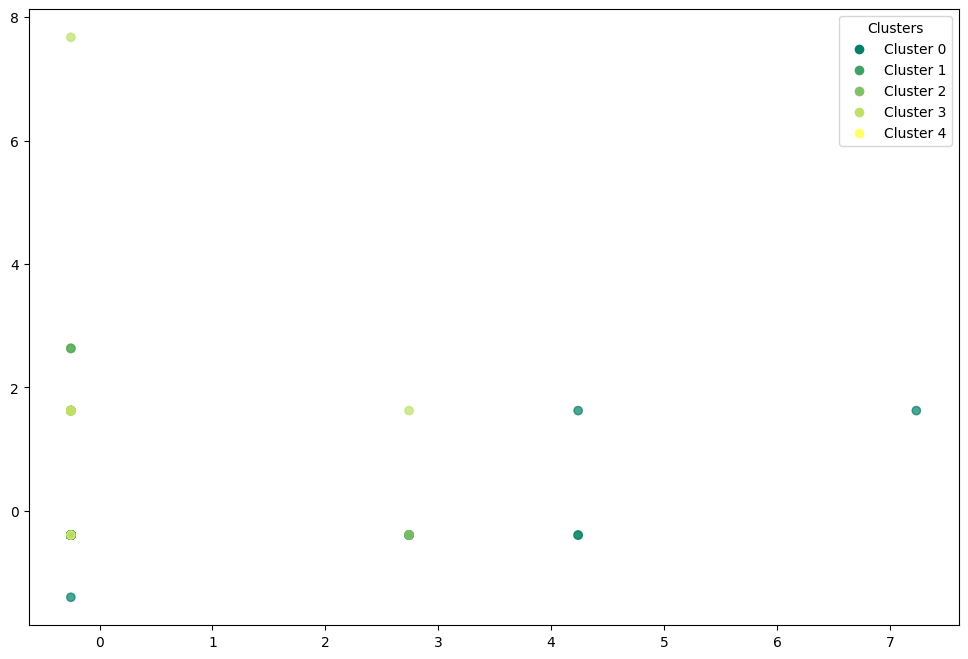

In [ ]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_spectral.iloc[:, 0], df_spectral.iloc[:, 1], 
                      c=df_spectral['spectral_clustering'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_spectral['spectral_clustering'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### spectral clustering with pca

In [ ]:
spectral_pca = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [ ]:
spectral_pca.fit(X_pca)

,n_clusters,5
,eigen_solver,None
,n_components,None
,random_state,None
,n_init,10
,gamma,1.0
,affinity,'nearest_neighbors'
,n_neighbors,10
,eigen_tol,'auto'
,assign_labels,'kmeans'
,degree,3


In [ ]:
df_pca_spectral = energy_scaled.copy()

In [ ]:
df_pca_spectral["spectral_pca"] = spectral_pca.labels_

In [ ]:
df_pca_spectral

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,spectral_pca
0,-0.253837,-0.393062,-0.341056,0.328680,-0.377747,0.043343,0.254063,0.434229,-0.551603,-0.215340,-0.238986,-0.536079,0.057203,-0.584972,-0.923455,4
1,-0.253837,-0.393062,-0.341056,0.328680,-0.348722,-0.790829,-0.592363,-0.463581,-0.434907,1.352920,-0.710625,-0.536079,0.057203,0.076626,0.497078,0
2,2.741435,-0.393062,-0.341056,0.328680,-0.235301,1.366570,-0.592363,-0.321822,-0.293931,-0.876253,2.206275,-0.536079,-0.526926,-0.584972,1.680856,0
3,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,-1.012677,-0.592363,-0.222262,-0.221171,-0.876253,-0.681451,-0.536079,0.057203,-0.584972,-0.743070,1
4,-0.253837,-0.393062,-0.341056,-0.978653,-0.103512,-0.632631,0.078046,-0.107236,-0.448818,-0.876253,-1.110300,-0.388051,-0.526926,5.700208,-1.464610,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,4.239070,-0.393062,0.985690,0.328680,-0.215464,0.571757,-0.592363,0.203763,-0.081153,-0.876253,0.568676,-0.388051,0.057203,0.076626,3.033745,2
173,-0.253837,-0.393062,0.985690,-0.978653,-0.377747,-0.102751,-0.592363,-0.469936,0.030917,-0.650026,0.371194,-0.388051,-0.332217,-0.584972,-0.359751,0
174,-0.253837,1.623517,-0.341056,0.328680,0.056303,-0.242116,0.146884,-0.712831,2.433124,1.885351,-0.255488,-0.536079,-0.526926,-0.584972,-0.371025,4
175,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,0.666041,-0.592363,-0.619994,-0.175921,0.531241,0.173905,-0.536079,-0.332217,-0.584972,0.215227,0


### spectral clustering with t-SNE

In [ ]:
spectral_tsne = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [ ]:
spectral_tsne.fit(X_tsne)

,n_clusters,5
,eigen_solver,None
,n_components,None
,random_state,None
,n_init,10
,gamma,1.0
,affinity,'nearest_neighbors'
,n_neighbors,10
,eigen_tol,'auto'
,assign_labels,'kmeans'
,degree,3


In [ ]:
df_tsne_spectral = energy_scaled.copy()

In [ ]:
df_tsne_spectral['spectral_tsne'] = spectral_tsne.labels_

In [ ]:
df_tsne_spectral

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,spectral_tsne
0,-0.253837,-0.393062,-0.341056,0.328680,-0.377747,0.043343,0.254063,0.434229,-0.551603,-0.215340,-0.238986,-0.536079,0.057203,-0.584972,-0.923455,2
1,-0.253837,-0.393062,-0.341056,0.328680,-0.348722,-0.790829,-0.592363,-0.463581,-0.434907,1.352920,-0.710625,-0.536079,0.057203,0.076626,0.497078,1
2,2.741435,-0.393062,-0.341056,0.328680,-0.235301,1.366570,-0.592363,-0.321822,-0.293931,-0.876253,2.206275,-0.536079,-0.526926,-0.584972,1.680856,2
3,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,-1.012677,-0.592363,-0.222262,-0.221171,-0.876253,-0.681451,-0.536079,0.057203,-0.584972,-0.743070,4
4,-0.253837,-0.393062,-0.341056,-0.978653,-0.103512,-0.632631,0.078046,-0.107236,-0.448818,-0.876253,-1.110300,-0.388051,-0.526926,5.700208,-1.464610,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,4.239070,-0.393062,0.985690,0.328680,-0.215464,0.571757,-0.592363,0.203763,-0.081153,-0.876253,0.568676,-0.388051,0.057203,0.076626,3.033745,3
173,-0.253837,-0.393062,0.985690,-0.978653,-0.377747,-0.102751,-0.592363,-0.469936,0.030917,-0.650026,0.371194,-0.388051,-0.332217,-0.584972,-0.359751,2
174,-0.253837,1.623517,-0.341056,0.328680,0.056303,-0.242116,0.146884,-0.712831,2.433124,1.885351,-0.255488,-0.536079,-0.526926,-0.584972,-0.371025,3
175,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,0.666041,-0.592363,-0.619994,-0.175921,0.531241,0.173905,-0.536079,-0.332217,-0.584972,0.215227,1


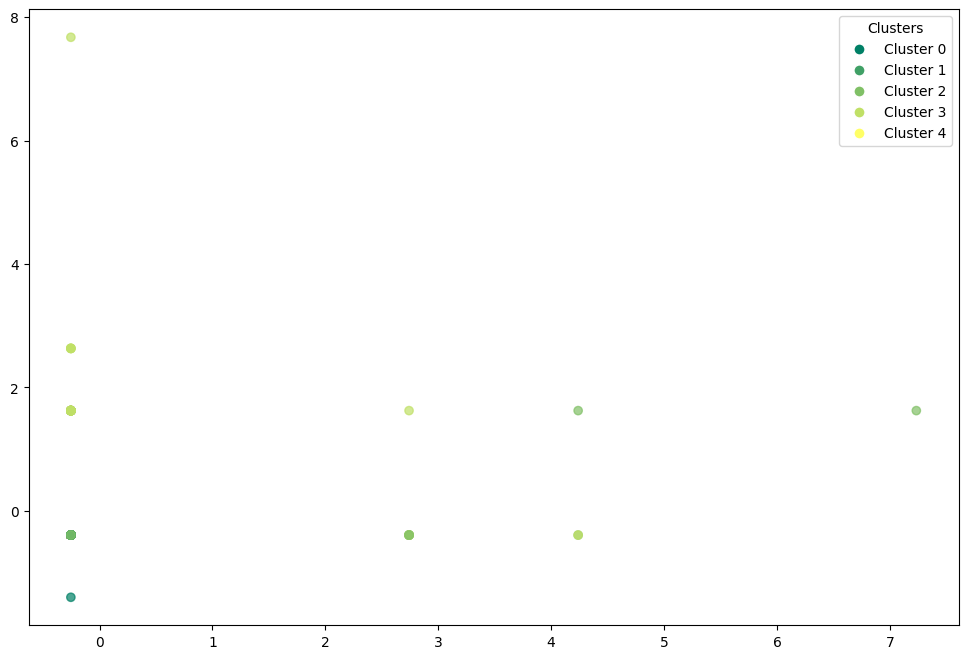

In [ ]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['spectral_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_spectral['spectral_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

### spectral clustering with umap

In [ ]:
spectral_umap = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [ ]:
spectral_umap.fit(X_umap)

,n_clusters,5
,eigen_solver,None
,n_components,None
,random_state,None
,n_init,10
,gamma,1.0
,affinity,'nearest_neighbors'
,n_neighbors,10
,eigen_tol,'auto'
,assign_labels,'kmeans'
,degree,3


In [ ]:
df_umap_spectral = energy_scaled.copy()

In [ ]:
df_umap_spectral['spectral_umap'] = spectral_umap.labels_

In [ ]:
df_umap_spectral

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,spectral_umap
0,-0.253837,-0.393062,-0.341056,0.328680,-0.377747,0.043343,0.254063,0.434229,-0.551603,-0.215340,-0.238986,-0.536079,0.057203,-0.584972,-0.923455,0
1,-0.253837,-0.393062,-0.341056,0.328680,-0.348722,-0.790829,-0.592363,-0.463581,-0.434907,1.352920,-0.710625,-0.536079,0.057203,0.076626,0.497078,0
2,2.741435,-0.393062,-0.341056,0.328680,-0.235301,1.366570,-0.592363,-0.321822,-0.293931,-0.876253,2.206275,-0.536079,-0.526926,-0.584972,1.680856,3
3,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,-1.012677,-0.592363,-0.222262,-0.221171,-0.876253,-0.681451,-0.536079,0.057203,-0.584972,-0.743070,1
4,-0.253837,-0.393062,-0.341056,-0.978653,-0.103512,-0.632631,0.078046,-0.107236,-0.448818,-0.876253,-1.110300,-0.388051,-0.526926,5.700208,-1.464610,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,4.239070,-0.393062,0.985690,0.328680,-0.215464,0.571757,-0.592363,0.203763,-0.081153,-0.876253,0.568676,-0.388051,0.057203,0.076626,3.033745,3
173,-0.253837,-0.393062,0.985690,-0.978653,-0.377747,-0.102751,-0.592363,-0.469936,0.030917,-0.650026,0.371194,-0.388051,-0.332217,-0.584972,-0.359751,1
174,-0.253837,1.623517,-0.341056,0.328680,0.056303,-0.242116,0.146884,-0.712831,2.433124,1.885351,-0.255488,-0.536079,-0.526926,-0.584972,-0.371025,4
175,-0.253837,-0.393062,-0.341056,-0.978653,-0.377747,0.666041,-0.592363,-0.619994,-0.175921,0.531241,0.173905,-0.536079,-0.332217,-0.584972,0.215227,0


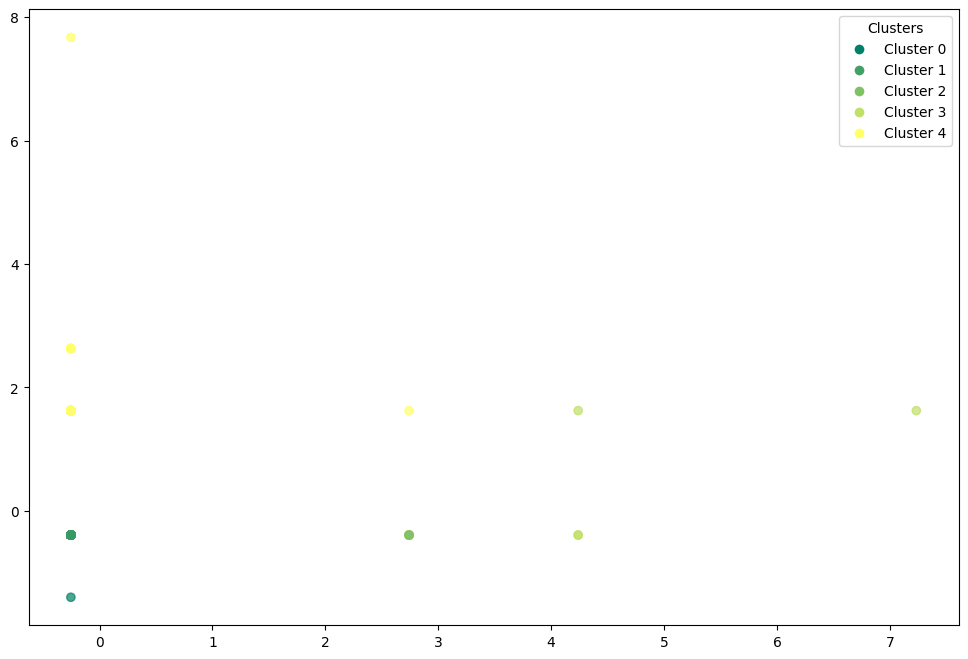

In [ ]:
plt.figure(figsize=(12,8)) 
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['spectral_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_spectral['spectral_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()